# **Segunda Actividad Integradora**

## <font color="yellow">Objetivo</font> 
Aplicar los conceptos aprendidos en el curso de Minería de Datos para realizar un análisis integral de un dataset real utilizando diversas técnicas de preprocesamiento y análisis exploratorio de datos. Esta actividad busca evaluar la capacidad del estudiante para aplicar conocimientos de manejo de datos, discretización, análisis y visualización para extraer información relevante, y comunicar sus hallazgos de manera clara y concisa.

## <font color="yellow">Instrucciones</font>
**1. Dataset Asignado:**

Utiliza el dataset "Adult" proporcionado por el docente. Este dataset contiene información recolectada durante un censo realizado en 1994 en Estados Unidos con el fin de determinar las características de las personas en relación a si ganan más de U$D 50,000 al año o no. El archivo adult_data.xls posee datos de 32,561 personas, y algunos de sus atributos son: 
- Edad, sexo, estado civil, nivel educativo
- Tipo de trabajo, número de horas semanales que trabaja
- Raza, país de origen o Capital.

**2. Análisis y Respuesta de Preguntas:**
   1. Verificación de Datos:
      - a. Verifica si la base de datos posee atributos con datos faltantes.
      - b. Verifica si existen atributos que necesiten normalización de sus valores. 
      - c. Identifica si hay atributos con valores inválidos.
   2. Relación de Campos: El nivel educativo de la persona está indicado en dos campos: Education y Education_num. Analiza cómo se relacionan estos dos atributos y documenta tus hallazgos.
   3. Reemplazo de Valores Faltantes:
      - a. Completa los valores faltantes de los atributos Education_num y Capital_Loss con el valor mínimo.
      - b. Completa el resto de los atributos que presenten valores faltantes con su correspondiente valor promedio.
   4. Generación de Atributos Nuevos: Genera atributos nuevos para solucionar los problemas encontrados en los incisos 1b y 1c.
      
**3. Discretización del Atributo Hours_per_week:** 

Realiza tres discretizaciones diferentes del atributo Hours_per_week y compara los resultados obtenidos:
   - a. En cuatro intervalos por partes iguales.
   - b. En los siguientes cuatro intervalos: [1..10], [11..50], [51..70], [71..MAX].
     
**4. Análisis de Atributos Seleccionados:**
- Selecciona los atributos: Edad, Education_num, Hours_per_week y Class. Realiza todos los posibles diagramas de dispersión utilizando la opción Scatter tomando al atributo Class como atributo para colorear. 
- Analiza los distintos diagramas y relaciona los atributos.
   - a. ¿Qué puedes decir de las edades con respecto a la ganancia anual?
   - b. ¿Puedes afirmar que las personas que poseen un nivel educativo por debajo de 8 y que trabajan menos de 40 horas no ganan más de 50 mil dólares por año?
   - c. ¿Existe alguna relación entre el nivel educativo y el hecho de ganar más de 50 mil dólares por año?
   - d. ¿Hay alguna relación con la cantidad de horas semanales trabajadas?

**Video Explicativo**: Realiza un video de máximo 1 minuto donde presentes las conclusiones del trabajo. El video debe ser preciso y conciso, destacando los puntos más relevantes del análisis. 


## Dataset Asignado
Cargamos e importamos el dataset de <code>"adult_data.csv"</code>:


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("adult_data.csv",  sep=";")
print("Primeros valores del set de datos adul_data:")
print(df.head(3))
print("\nInformacion sobre las variables:")
print(df.info())

Primeros valores del set de datos adul_data:
   Age         Work_Class  fnlwgt   Education  Eduction_num  \
0   39          State-gov   77516   Bachelors          13.0   
1   50   Self-emp-not-inc   83311   Bachelors          13.0   
2   38            Private  215646     HS-grad           9.0   

        Marital_status          Occupation    Relationship    Rice   Sex  \
0        Never-married        Adm-clerical   Not-in-family   White  Male   
1   Married-civ-spouse     Exec-managerial         Husband   White  Male   
2             Divorced   Handlers-cleaners   Not-in-family   White  Male   

   Capital_gain  Capital_loss  Hours_per_week  Native_country   Class  
0        2174.0           0.0            40.0   United-States   <=50K  
1           0.0           0.0            13.0   United-States   <=50K  
2           0.0           0.0            40.0   United-States   <=50K  

Informacion sobre las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560

In [3]:
# estadisticas descriptivas
estadistica = df.describe()
print("Resumen Estadístico:\n", estadistica)

Resumen Estadístico:
                 Age        fnlwgt  Eduction_num  Capital_gain  Capital_loss  \
count  32561.000000  3.256100e+04  32531.000000  32551.000000  32549.000000   
mean      38.589325  1.897784e+05     10.080815   1077.979908     87.336016   
std       13.693699  1.055500e+05      2.572948   7386.402293    403.031007   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max      190.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32545.000000  
mean        40.436718  
std         12.347939  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Análisis y Respuesta de Preguntas:
### 1. Verificacion de los datos

In [4]:
# Verificar datos nulos
faltantes = df.isnull().sum()
print("Datos faltantes por columna:")
print(faltantes[faltantes > 0])  # Muestra solo las columnas con datos faltantes


Datos faltantes por columna:
Work_Class        1836
Eduction_num        30
Occupation        1843
Capital_gain        10
Capital_loss        12
Hours_per_week      16
Native_country     583
dtype: int64


De acuerdo con el resumen estadístico del conjunto de datos, los atributos como <code>fnlwgt, Capital_gain, Capital_loss y Hours_per_week</code> tienen una variabilidad considerable entre sus valores mínimos y máximos.

Por ejemplo:

<code>fnlwgt</code> tiene un rango entre 12,285 y 1,484,705.
<code>Capital_gain</code> tiene un rango entre 0 y 99,999.
<code>Hours_per_week</code> tiene un rango entre 1 y 99.
Estos valores tienen diferencias en sus rangos, lo que puede afectar negativamente a algunos algoritmos. Es recomendable normalizar estos atributos.

In [5]:
# Revisar valores únicos para identificar posibles errores tipográficos
unique_values = {
    'Sex': df['Sex'].unique(),
    'Rice': df['Rice'].unique(),  # Nota: parece ser un error tipográfico en lugar de "Race"
    'Class': df['Class'].unique()
}
print(unique_values)

{'Sex': array(['Male', 'F', 'Female', 'M'], dtype=object), 'Rice': array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object), 'Class': array([' <=50K', ' >50K'], dtype=object)}


### 2. Relacion de los Campos
   
**Education:** Este campo contiene el nivel educativo descrito de manera textual. Los valores son categorías como "Bachelors", "Masters", "HS-grad", "Doctorate", etc.

**Education_num:** Este campo es un valor numérico que representa el nivel educativo de manera cuantitativa. Un valor numérico más alto indica un nivel educativo más alto. Por ejemplo, un valor de "13" puede corresponder a un "Bachelors" o "Undergraduate degree", mientras que un valor de "16" podría corresponder a un "Doctorate" o "PhD".

**Relación Esperada**
La relación esperada es que los valores en la columna Education_num deben correlacionarse con los valores en la columna Education de manera lógica y consistente. 

**Verificación de la Relación entre las Columnas**

Se verifica los valores en Education_num si son coherentes con los valores de Education mediante un análisis descriptivo:

In [6]:
# Verificar la relación entre los dos campos 'Education' y 'Education_num'
relation = df[['Education', 'Eduction_num']].groupby('Education').agg(
    ['min', 'max', 'mean', 'count']).sort_values([('Eduction_num', 'mean')])

print(relation)


             Eduction_num                   
                      min   max  mean  count
Education                                   
Preschool             1.0   1.0   1.0     51
1st-4th               2.0   2.0   2.0    168
5th-6th               3.0   3.0   3.0    333
7th-8th               4.0   4.0   4.0    646
9th                   5.0   5.0   5.0    514
10th                  6.0   6.0   6.0    931
11th                  7.0   7.0   7.0   1174
12th                  8.0   8.0   8.0    432
HS-grad               9.0   9.0   9.0  10488
Some-college         10.0  10.0  10.0   7284
Assoc-voc            11.0  11.0  11.0   1382
Assoc-acdm           12.0  12.0  12.0   1067
Bachelors            13.0  13.0  13.0   5353
Masters              14.0  14.0  14.0   1720
Prof-school          15.0  15.0  15.0    576
Doctorate            16.0  16.0  16.0    412


Aquí se puede observar lo siguiente: La columna <code>Education_num</code> tiene un valor fijo para cada nivel educativo. 

Por ejemplo:
- <code>Preschool</code> tiene un valor de 1.0
- <code>Bachelors</code> tiene un valor de 13.0
- <code>Doctorate</code> tiene un valor de 16.0

Esto sugiere que la columna <code>Education_num</code> fue diseñada para proporcionar una representación numérica del nivel educativo.

Repetición de valores: Para cada valor de <code>Education_num</code>, existe un conteo (count) que indica cuántas personas pertenecen a ese nivel educativo. Por ejemplo, <code>HS-grad</code> tiene 10,488 registros, lo que indica que es el nivel educativo más común en este conjunto de datos.

Verificación de la consistencia: Los valores min, max, y mean para cada nivel educativo coinciden con los valores de <code>Education_num</code> asociados, lo que muestra que no hay inconsistencias entre las dos columnas.

### 3. Reemplazo de valores faltantes

Para las columnas específicas <code>Education_num</code> y <code>Capital_loss</code>, reemplazaremos los valores faltantes con el valor mínimo de cada columna:

In [7]:
# Reemplazar valores faltantes en 'Education_num' con el valor mínimo
df['Eduction_num'].fillna(df['Eduction_num'].min())

# Reemplazar valores faltantes en 'Capital_loss' con el valor mínimo
df['Capital_loss'].fillna(df['Capital_loss'].min())


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    0.0
32558    0.0
32559    0.0
32560    0.0
Name: Capital_loss, Length: 32561, dtype: float64

Para el resto de las columnas numéricas que puedan tener valores faltantes, usaremos el valor promedio (media) de cada columna.

In [8]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Reemplazar valores faltantes en las columnas numéricas con el valor promedio
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verificar nuevamente si hay valores faltantes
print(df.isnull().sum())


Age                  0
Work_Class        1836
fnlwgt               0
Education            0
Eduction_num         0
Marital_status       0
Occupation        1843
Relationship         0
Rice                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Class                0
dtype: int64


### 4. Generación de Atributos Nuevos
Dado que las columnas <code>Work_Class</code>, <code>Occupation</code>, y <code>Native_country</code> tienen valores faltantes y son de tipo object (es decir, son categóricas o de texto), es necesario abordarlas de manera diferente que las columnas numéricas.

Se reemplaza los valores faltantes en columnas categóricas con <code>"Unknown"</code> (desconocido):

In [9]:
# Reemplazar valores faltantes en columnas categóricas con 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Verificar si hay valores faltantes después de hacer el reemplazo
print(df.isnull().sum())


Age               0
Work_Class        0
fnlwgt            0
Education         0
Eduction_num      0
Marital_status    0
Occupation        0
Relationship      0
Rice              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Class             0
dtype: int64


Reemplazar valores inconsistentes: Se reemplaza los valores inconsistentes en la columna Sex para que todos sigan un mismo formato (por ejemplo, 'Male' y 'Female' en lugar de 'M' y 'F').

Revisar la columna Rice: Rice podría ser un error tipográfico y en realidad debería ser Race, se renombra la columna.

In [10]:
# Corregir valores de la columna 'Sex' para que sean consistentes
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})

# Si 'Rice' es un error tipográfico, renombrarlo a 'Race'
df.rename(columns={'Rice': 'Race'}, inplace=True)

# Verificar si las correcciones fueron exitosas
print("\nValores únicos corregidos:")
print(df[['Sex', 'Race', 'Class']].nunique())
print("\nPrimeras filas después de las correcciones:")
print(df.head())


Valores únicos corregidos:
Sex      2
Race     5
Class    2
dtype: int64

Primeras filas después de las correcciones:
   Age         Work_Class  fnlwgt   Education  Eduction_num  \
0   39          State-gov   77516   Bachelors          13.0   
1   50   Self-emp-not-inc   83311   Bachelors          13.0   
2   38            Private  215646     HS-grad           9.0   
3   53            Private  234721        11th           7.0   
4   28            Private  338409   Bachelors          13.0   

        Marital_status          Occupation    Relationship    Race     Sex  \
0        Never-married        Adm-clerical   Not-in-family   White    Male   
1   Married-civ-spouse     Exec-managerial         Husband   White    Male   
2             Divorced   Handlers-cleaners   Not-in-family   White    Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black    Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black  Female   

   Capital_gain  Capital_loss  Ho

Este filtro asegura que solo queden las filas en las que la edad sea 100 o menos. Esto elimina las edades inusuales, que podrían ser errores o datos extremos no representativos del conjunto de datos.

In [16]:
# Eliminar las filas donde 'Age' es mayor a 100 años
df = df[df['Age'] <= 100]


Para usar el método del Interquartile Range (IQR) y detectar valores atípicos en las columnas Capital_gain y Capital_loss, se sigue estos pasos:

El IQR es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1) de los datos, y se utiliza para detectar valores atípicos. Los valores atípicos se consideran aquellos que están fuera del rango:

In [15]:
# Calcular el IQR para 'Capital_gain' y 'Capital_loss'
Q1_gain = df['Capital_gain'].quantile(0.25)
Q3_gain = df['Capital_gain'].quantile(0.75)
IQR_gain = Q3_gain - Q1_gain
lower_bound_gain = Q1_gain - 1.5 * IQR_gain
upper_bound_gain = Q3_gain + 1.5 * IQR_gain

Q1_loss = df['Capital_loss'].quantile(0.25)
Q3_loss = df['Capital_loss'].quantile(0.75)
IQR_loss = Q3_loss - Q1_loss
lower_bound_loss = Q1_loss - 1.5 * IQR_loss
upper_bound_loss = Q3_loss + 1.5 * IQR_loss

# Filtrar los datos para eliminar valores atípicos basados en IQR
df_filtered = df[(df['Capital_gain'] >= lower_bound_gain) & (df['Capital_gain'] <= upper_bound_gain) &
                 (df['Capital_loss'] >= lower_bound_loss) & (df['Capital_loss'] <= upper_bound_loss)]

# Verificar el tamaño del dataframe filtrado
print(f"Filas antes de filtrar: {len(df)}")
print(f"Filas después de filtrar: {len(df_filtered)}")


Filas antes de filtrar: 31788
Filas después de filtrar: 28309


## Discretización del Atributo Hours_per_week:

In [20]:

# Calcular el valor máximo de 'Hours_per_week'
max_value = df['Hours_per_week'].max()

# Definir los intervalos y etiquetas
intervalos = [1, 10, 50, 70, max_value]
etiquetas = ['1-10', '11-50', '51-70', '71+']

# Aplicar la discretización en intervalos predefinidos
df['Hours_per_week_custom'] = pd.cut(df['Hours_per_week'], bins=intervalos, labels=etiquetas, right=True)

# Mostrar la distribución de los intervalos
print("\nDistribución de 'Hours_per_week' en intervalos predefinidos:")
print(df['Hours_per_week_custom'].value_counts())

# Mostrar algunas filas con las nuevas discretizaciones
print("\nPrimeras filas con las nuevas discretizaciones:")
print(df[['Hours_per_week', 'Hours_per_week_custom']].head())




Distribución de 'Hours_per_week' en intervalos predefinidos:
Hours_per_week_custom
11-50    27622
51-70     2964
1-10       705
71+        477
Name: count, dtype: int64

Primeras filas con las nuevas discretizaciones:
   Hours_per_week Hours_per_week_custom
0            40.0                 11-50
1            13.0                 11-50
2            40.0                 11-50
3            40.0                 11-50
4            40.0                 11-50


Mayor concentración en el rango 11-50 horas: La gran mayoría de los individuos parecen estar en un rango de trabajo de tiempo completo, lo que es bastante representativo de muchas ocupaciones. Este patrón es normal en trabajos convencionales y también puede indicar un sesgo hacia trabajos más tradicionales.

Menor proporción de individuos en intervalos de alta carga laboral (71+ horas): Aunque el grupo que trabaja más de 70 horas es pequeño, es importante analizarlo más a fondo. Los individuos en este rango podrían estar enfrentando situaciones extremas, lo que podría derivar en problemas de bienestar o salud laboral si las horas extras son recurrentes.

### Normalizacion y Outliers restantes
Antes de LLegar al proceso de Visualizacion apliqué normalización y filtro de outliers para luego llegar a graficar los diagramas de dispersión:

**Filtrar outliers**: Utilizaremos el IQR (Interquartile Range) para detectar y eliminar los outliers de las columnas relevantes antes de graficar.

**Normalización**: Aplicaremos la normalización (usando StandardScaler de sklearn) a las columnas numéricas para ajustar la escala de las variables y tenerlas en el mismo rango.

**Graficar los diagramas de dispersión**: Una vez filtrados los outliers y normalizados los datos, graficaremos los diagramas de dispersión solicitados.


### Paso 1: Filtrar Outliers usando el IQR
Primero, identificamos y eliminamos los outliers utilizando el IQR para las columnas relevantes (Age, Eduction_num, Hours_per_week).

In [44]:
# Filtrar Outliers usando el IQR
# Calcular el IQR para las columnas relevantes
Q1 = df[['Age', 'Eduction_num', 'Hours_per_week']].quantile(0.25)
Q3 = df[['Age', 'Eduction_num', 'Hours_per_week']].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_clean = df[~((df[['Age', 'Eduction_num', 'Hours_per_week']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Eduction_num', 'Hours_per_week']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificar los cambios
print(f"Datos después de filtrar outliers: {df_clean.shape}")

Datos después de filtrar outliers: (22129, 16)


### Paso 2: Normalización de las columnas numéricas
Una vez filtrados los outliers, aplicaremos la normalización a las columnas de interés (Age, Eduction_num, Hours_per_week) utilizando el StandardScaler.

In [45]:
from sklearn.preprocessing import StandardScaler

# Inicializar el scaler
scaler = StandardScaler()

# Normalizar las columnas
df_clean[['Age', 'Eduction_num', 'Hours_per_week']] = scaler.fit_transform(df_clean[['Age', 'Eduction_num', 'Hours_per_week']])

# Verificar la normalización
print(df_clean[['Age', 'Eduction_num', 'Hours_per_week']].head())


        Age  Eduction_num  Hours_per_week
0  0.054589      1.234371       -0.388415
2 -0.028762     -0.602257       -0.388415
3  1.221503     -1.520572       -0.388415
4 -0.862272      1.234371       -0.388415
5 -0.112113      1.693528       -0.388415


C:\Users\Ever\AppData\Local\Temp\ipykernel_18620\887575234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Age', 'Eduction_num', 'Hours_per_week']] = scaler.fit_transform(df_clean[['Age', 'Eduction_num', 'Hours_per_week']])


## 4. Análisis de Atributos Seleccionados:

Ahora que tenemos los datos filtrados y normalizados, podemos crear los diagramas de dispersión para las relaciones solicitadas: Edad vs. Clase, Nivel Educativo vs. Clase, y Horas por Semana vs. Clase.

C:\Users\Ever\AppData\Local\Temp\ipykernel_18620\2525454797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Age', data=df_clean, palette='viridis')


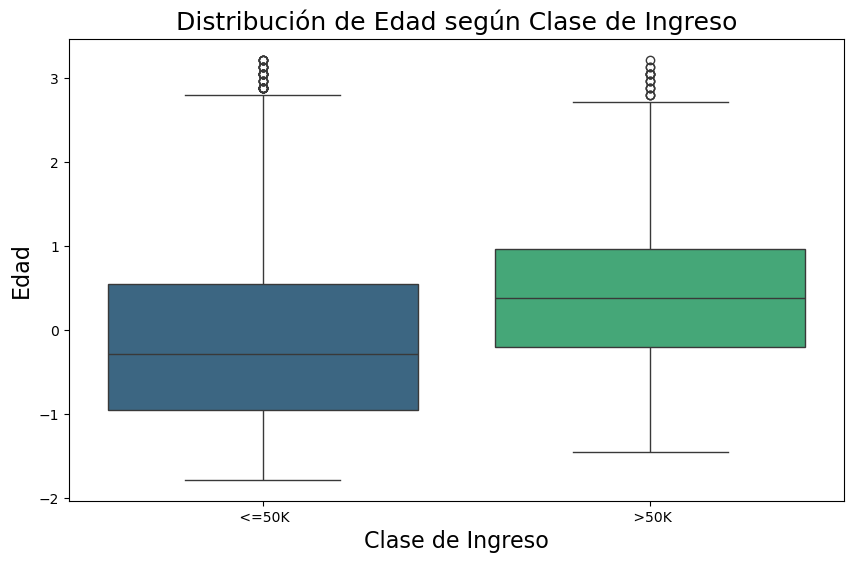

In [71]:
# Diagrama de cajas para Edad por Clase de Ingreso
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Age', data=df_clean, palette='viridis')
plt.title("Distribución de Edad según Clase de Ingreso", fontsize=18)
plt.xlabel("Clase de Ingreso", fontsize=16)
plt.ylabel("Edad", fontsize=16)
plt.show()

C:\Users\Ever\AppData\Local\Temp\ipykernel_18620\1496632594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Eduction_num', data=df_clean, palette='viridis')


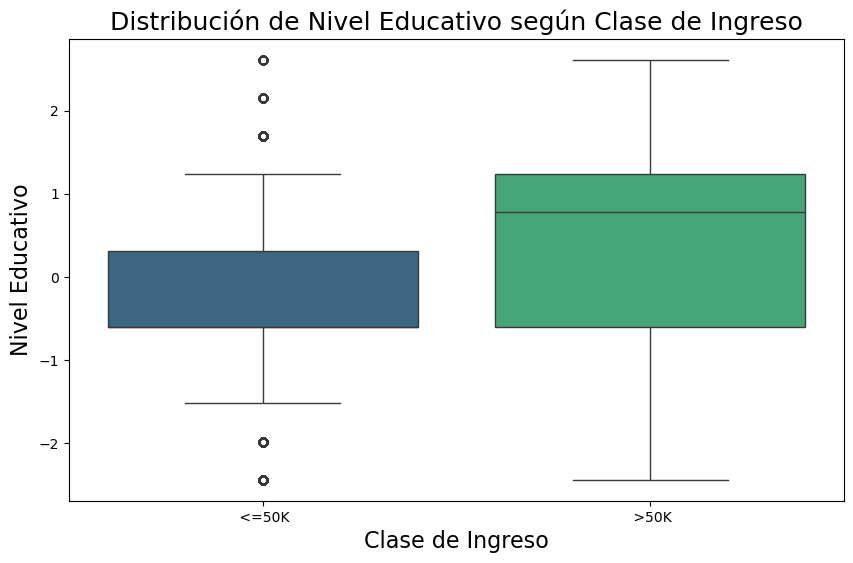

In [72]:

# Diagrama de cajas para Nivel Educativo por Clase de Ingreso
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Eduction_num', data=df_clean, palette='viridis')
plt.title("Distribución de Nivel Educativo según Clase de Ingreso", fontsize=18)
plt.xlabel("Clase de Ingreso", fontsize=16)
plt.ylabel("Nivel Educativo", fontsize=16)
plt.show()


C:\Users\Ever\AppData\Local\Temp\ipykernel_18620\2466603031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Hours_per_week', data=df_clean, palette='viridis')


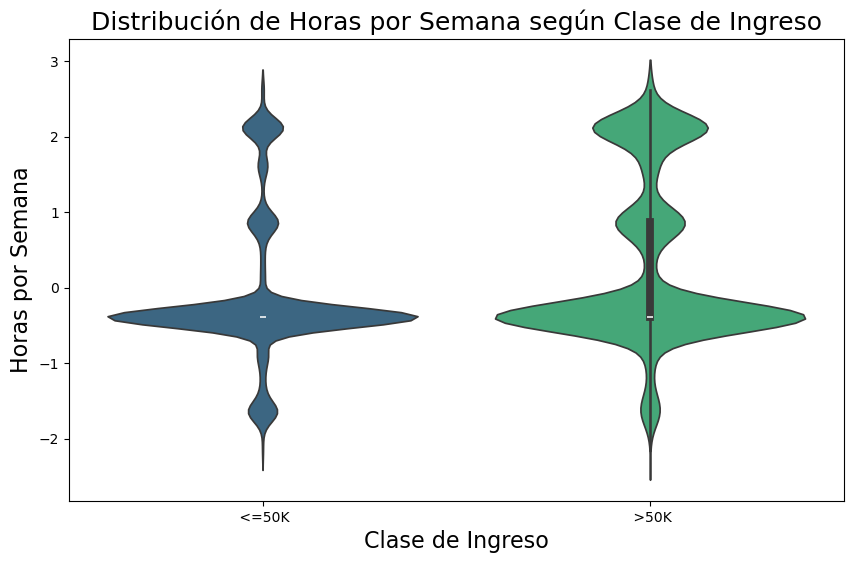

In [75]:
# Violin plot para Horas por Semana por Clase de Ingreso
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Hours_per_week', data=df_clean, palette='viridis')
plt.title("Distribución de Horas por Semana según Clase de Ingreso", fontsize=18)
plt.xlabel("Clase de Ingreso", fontsize=16)
plt.ylabel("Horas por Semana", fontsize=16)
plt.show()

### Análisis de las Preguntas
- a. ¿Qué puedes decir de las edades con respecto a la ganancia anual?
  
**Interpretación**: En el diagrama de cajas de Edad vs Clase de Ingreso, podemos observar cómo se distribuyen las edades de las personas que ganan más de 50K y las que ganan menos de 50K.
Si vemos que las personas con ingresos más altos tienden a ser mayores, esto podría indicar que hay una relación entre la experiencia laboral y los ingresos. En cambio, si los jóvenes tienden a estar más concentrados en el grupo de menores ingresos, esto puede sugerir que los ingresos más altos están asociados a una mayor experiencia o antigüedad laboral.

- b. ¿Puedes afirmar que las personas que poseen un nivel educativo por debajo de 8 y que trabajan menos de 40 horas no ganan más de 50 mil dólares por año?

**Interpretación**: El diagrama de Nivel Educativo vs Clase de Ingreso y Horas por Semana vs Clase de Ingreso nos puede ayudar a responder esta pregunta.
Si la mayoría de las personas con un nivel educativo por debajo de 8 (y menos de 40 horas trabajadas) están en el grupo de ingresos menores a 50K, podríamos asumir que existe una fuerte correlación entre estos factores. Sin embargo, sería importante corroborar este patrón visualizando las estadísticas del dataset y calculando la cantidad de registros que cumplen con estas condiciones.

- c. ¿Existe alguna relación entre el nivel educativo y el hecho de ganar más de 50 mil dólares por año?

**Interpretación**: En el gráfico de Nivel Educativo vs Clase de Ingreso, podemos observar si las personas con niveles educativos más altos tienden a estar más frecuentemente en el grupo de ingresos superiores a 50K.
Si existe un patrón claro donde las personas con niveles educativos más altos están mayormente en el grupo de ingresos mayores a 50K, esto podría sugerir que el nivel educativo tiene un impacto significativo sobre los ingresos.

- d. ¿Hay alguna relación con la cantidad de horas semanales trabajadas?
  
**Interpretación**: Si, ya que en el gráfico de Horas por Semana vs Clase de Ingreso, podemos ver si las personas que trabajan más de 40 horas por semana tienden a estar más frecuentemente en el grupo con ingresos mayores a 50K.
Aparte, por ejemplo, se observa una mayor densidad en Horas por Semana para la clase >50K en valores altos, esto puede indicar que trabajar más horas está asociado con ingresos más altos.